In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Глобальная переменная для подсчета вызовов функции egg_holder
egg_holder_calls = 0

# The function has multiple local minima and one global minimum at f(512, 404.2319) = -959.6407 for n = 2 dimension.
def egg_holder(x):
    global egg_holder_calls
    egg_holder_calls += 1
    R = 0
    for i in range(x.shape[0]-1):
        R -= x[i]*np.sin(np.sqrt(abs(x[i]-x[i+1]-47))) + (x[i+1]+47)*np.sin(np.sqrt(abs(x[i+1]+x[i]/2+47)))
    return R

In [4]:
# Оригинальный алгоритм

def GWO(obj_func, lb, ub, dim, search_agent_no, max_iter):
    global egg_holder_calls
    egg_holder_calls = 0

    alpha_pos = np.zeros(dim)
    beta_pos = np.zeros(dim)
    delta_pos = np.zeros(dim)
    alpha_score = float("inf")
    beta_score = float("inf")
    delta_score = float("inf")
    pos = np.zeros((search_agent_no, dim))
    for i in range(search_agent_no):
        pos[i, :] = np.random.uniform(lb, ub, dim)
    for l in range(max_iter):
        for i in range(search_agent_no):
            fitness = obj_func(pos[i, :])
            if fitness < alpha_score:
                delta_score = beta_score
                delta_pos = beta_pos.copy()
                beta_score = alpha_score
                beta_pos = alpha_pos.copy()
                alpha_score = fitness
                alpha_pos = pos[i, :].copy()
            if fitness > alpha_score and fitness < beta_score:
                delta_score = beta_score
                delta_pos = beta_pos.copy()
                beta_score = fitness
                beta_pos = pos[i, :].copy()
        a = 2 * (1 - l / max_iter)
        #a = 2 * (1 - l / (max_iter - 1))
        for i in range(search_agent_no):
            r1 = np.random.rand(dim)  # random weight factor
            r2 = np.random.rand(dim)  # random weight factor
            A1 = 2 * a * r1 - a  
            C1 = 2 * r2  
            D_alpha = abs(C1 * alpha_pos - pos[i, :])  
            X1 = alpha_pos - A1 * D_alpha  
            r1 = np.random.rand(dim)  # random weight factor
            r2 = np.random.rand(dim)  # random weight factor
            A2 = 2 * a * r1 - a  
            C2 = 2 * r2  
            D_beta = abs(C2 * beta_pos - pos[i, :]) 
            X2 = beta_pos - A2 * D_beta  
            r1 = np.random.rand(dim)  
            r2 = np.random.rand(dim)  
            A3 = 2 * a * r1 - a  
            C3 = 2 * r2  
            D_delta = abs(C3 * delta_pos - pos[i, :])  
            X3 = delta_pos - A3 * D_delta  
            pos[i, :] = (X1 + X2 + X3) / 3  
            # check if position is within bounds
            pos[i, :] = np.clip(pos[i, :], lb, ub)
        # record the best fitness value for each iteration
        best_fitness = alpha_score
        # Check if the best fitness value is below a certain threshold
        if best_fitness < -3719.7248363 * 0.95: #даем право на погрешность в 5 %
            break
        #print("Iteration: {}  x: {}  Fitness: {:.4f}".format(l+1, alpha_pos, best_fitness))
    return alpha_pos, alpha_score, l + 1, egg_holder_calls

dim = 2
search_agent_no = 40
max_iter = 100
lb = np.full(dim, -512)
ub = np.full(dim, 512)


best_pos, best_score, iterations, egg_holder_calls = GWO(egg_holder, lb, ub, dim, search_agent_no, max_iter)

print("Best position:", best_pos)
print("Best score:", best_score)

Best position: [512.         404.28180297]
Best score: -959.637819945482


In [13]:
# Модификация с двумя вожаками

def GWO_mod1(obj_func, lb, ub, dim, search_agent_no, max_iter):
    global egg_holder_calls
    egg_holder_calls = 0

    alpha_pos = np.zeros(dim)
    beta_pos = np.zeros(dim)
    alpha_score = float("inf")
    beta_score = float("inf")
    pos = np.zeros((search_agent_no, dim))
    for i in range(search_agent_no):
        pos[i, :] = np.random.uniform(lb, ub, dim)
    for l in range(max_iter):
        for i in range(search_agent_no):
            fitness = obj_func(pos[i, :])
            if fitness < alpha_score:
                beta_score = alpha_score
                beta_pos = alpha_pos.copy()
                alpha_score = fitness
                alpha_pos = pos[i, :].copy()
            if fitness > alpha_score and fitness < beta_score:
                beta_score = fitness
                beta_pos = pos[i, :].copy()
        a = 2 - 2 * l / (max_iter - 1)  
        for i in range(search_agent_no):
            r1 = np.random.rand(dim)  # random weight factor
            r2 = np.random.rand(dim)  # random weight factor
            A1 = 2 * a * r1 - a  
            C1 = 2 * r2  
            D_alpha = abs(C1 * alpha_pos - pos[i, :])  
            X1 = alpha_pos - A1 * D_alpha  
            r1 = np.random.rand(dim)  # random weight factor
            r2 = np.random.rand(dim)  # random weight factor
            A2 = 2 * a * r1 - a  
            C2 = 2 * r2  
            D_beta = abs(C2 * beta_pos - pos[i, :]) 
            X2 = beta_pos - A2 * D_beta  
            pos[i, :] = (X1 + X2) / 2
            # check if position is within bounds
            pos[i, :] = np.clip(pos[i, :], lb, ub)
        # record the best fitness value for each iteration
        best_fitness = alpha_score
        if best_fitness < -8291.2400675 * 0.95:
            break
        #print("Iteration: {}  x: {}  Fitness: {:.4f}".format(l+1, alpha_pos, best_fitness))
    return alpha_pos, alpha_score, l + 1, egg_holder_calls
dim = 3
search_agent_no = 350
max_iter = 300
lb = np.full(dim, -512)
ub = np.full(dim, 512)


best_pos, best_score, iterations, egg_holder_calls = GWO_mod1(egg_holder, lb, ub, dim, search_agent_no, max_iter)

print("Best position:", best_pos)
print("Best score:", best_score)

Best position: [-313.9431836   512.          404.23050269]
Best score: -1780.8370556652017


In [15]:
# 3 Вожака, delta_pos = random

def GWO_mod2(obj_func, lb, ub, dim, search_agent_no, max_iter):
    global egg_holder_calls
    egg_holder_calls = 0

    alpha_pos = np.zeros(dim)
    beta_pos = np.zeros(dim)
    delta_pos = np.zeros(dim)
    alpha_score = float("inf")
    beta_score = float("inf")
    delta_score = float("inf")
    pos = np.zeros((search_agent_no, dim))
    for i in range(search_agent_no):
        pos[i, :] = np.random.uniform(lb, ub, dim)
    for l in range(max_iter):
        for i in range(search_agent_no):
            fitness = obj_func(pos[i, :])
            if fitness < alpha_score:
                delta_score = beta_score
                delta_pos = beta_pos.copy()
                beta_score = alpha_score
                beta_pos = alpha_pos.copy()
                alpha_score = fitness
                alpha_pos = pos[i, :].copy()
            if fitness > alpha_score and fitness < beta_score:
                delta_score = beta_score
                delta_pos = beta_pos.copy()
                beta_score = fitness
                beta_pos = pos[i, :].copy()
            if fitness > alpha_score and fitness > beta_score and fitness < delta_score:
                delta_score = fitness
                delta_pos = pos[i, :].copy()
        a = 2 * (1 - l / max_iter)  
        for i in range(search_agent_no):
            r1 = np.random.rand(dim)  # random weight factor
            r2 = np.random.rand(dim)  # random weight factor
            A1 = 2 * a * r1 - a  
            C1 = 2 * r2  
            D_alpha = abs(C1 * alpha_pos - pos[i, :])  
            X1 = alpha_pos - A1 * D_alpha  
            r1 = np.random.rand(dim)  # random weight factor
            r2 = np.random.rand(dim)  # random weight factor
            A2 = 2 * a * r1 - a  
            C2 = 2 * r2  
            D_beta = abs(C2 * beta_pos - pos[i, :]) 
            X2 = beta_pos - A2 * D_beta  
            r1 = np.random.rand(dim)  
            r2 = np.random.rand(dim)  
            A3 = 2 * a * r1 - a  
            C3 = 2 * r2  
            D_delta = abs(C3 * delta_pos - pos[i, :])  
            X3 = delta_pos - A3 * D_delta  
            pos[i, :] = (X1 + X2 + X3) / 3  
            # check if position is within bounds
            pos[i, :] = np.clip(pos[i, :], lb, ub)
            # generate new delta_pos
            delta_pos = np.random.uniform(lb, ub, dim)
        # record the best fitness value for each iteration
        best_fitness = alpha_score
        if best_fitness < -8291.2400675 * 0.95:
            break
        #print("Iteration: {}  x: {}  Fitness: {:.4f}".format(l+1, alpha_pos, best_fitness))
    return alpha_pos, alpha_score, l + 1, egg_holder_calls

dim = 3
search_agent_no = 400
max_iter = 400
lb = np.full(dim, -512)
ub = np.full(dim, 512)


best_pos, best_score, iterations, egg_holder_calls = GWO_mod2(egg_holder, lb, ub, dim, search_agent_no, max_iter)

print("Best position:", best_pos)
print("Best score:", best_score)

Best position: [354.11361726 512.         404.86513358]
Best score: -1816.6315946606646


In [18]:
# Оригинальный метод с измененным рассчетным соотношением a = 2 * (1 - l**2 / max_iter**2)  

def GWO_mod3(obj_func, lb, ub, dim, search_agent_no, max_iter):
    global egg_holder_calls
    egg_holder_calls = 0

    alpha_pos = np.zeros(dim)
    beta_pos = np.zeros(dim)
    delta_pos = np.zeros(dim)
    alpha_score = float("inf")
    beta_score = float("inf")
    delta_score = float("inf")
    pos = np.zeros((search_agent_no, dim))
    for i in range(search_agent_no):
        pos[i, :] = np.random.uniform(lb, ub, dim)
    for l in range(max_iter):
        for i in range(search_agent_no):
            fitness = obj_func(pos[i, :])
            if fitness < alpha_score:
                delta_score = beta_score
                delta_pos = beta_pos.copy()
                beta_score = alpha_score
                beta_pos = alpha_pos.copy()
                alpha_score = fitness
                alpha_pos = pos[i, :].copy()
            if fitness > alpha_score and fitness < beta_score:
                delta_score = beta_score
                delta_pos = beta_pos.copy()
                beta_score = fitness
                beta_pos = pos[i, :].copy()
        a = 2 * (1 - l**2 / max_iter**2)
        #a = 2 * (1 - l / (max_iter - 1))
        for i in range(search_agent_no):
            r1 = np.random.rand(dim)  # random weight factor
            r2 = np.random.rand(dim)  # random weight factor
            A1 = 2 * a * r1 - a  
            C1 = 2 * r2  
            D_alpha = abs(C1 * alpha_pos - pos[i, :])  
            X1 = alpha_pos - A1 * D_alpha  
            r1 = np.random.rand(dim)  # random weight factor
            r2 = np.random.rand(dim)  # random weight factor
            A2 = 2 * a * r1 - a  
            C2 = 2 * r2  
            D_beta = abs(C2 * beta_pos - pos[i, :]) 
            X2 = beta_pos - A2 * D_beta  
            r1 = np.random.rand(dim)  
            r2 = np.random.rand(dim)  
            A3 = 2 * a * r1 - a  
            C3 = 2 * r2  
            D_delta = abs(C3 * delta_pos - pos[i, :])  
            X3 = delta_pos - A3 * D_delta  
            pos[i, :] = (X1 + X2 + X3) / 3  
            # check if position is within bounds
            pos[i, :] = np.clip(pos[i, :], lb, ub)
        # record the best fitness value for each iteration
        best_fitness = alpha_score
        if best_fitness < -8291.2400675 * 0.95:
            break
        #print("Iteration: {}  x: {}  Fitness: {:.4f}".format(l+1, alpha_pos, best_fitness))
    return alpha_pos, alpha_score, l + 1, egg_holder_calls

dim = 2
search_agent_no = 20
max_iter = 100
lb = np.full(dim, -512)
ub = np.full(dim, 512)


best_pos, best_score, iterations, egg_holder_calls = GWO_mod3(egg_holder, lb, ub, dim, search_agent_no, max_iter)

print("Best position:", best_pos)
print("Best score:", best_score)

Best position: [-459.46382525 -384.67659737]
Best score: -785.5598672839975


In [10]:
# Модификация с двумя вожаками и измененным a

def GWO_mod4(obj_func, lb, ub, dim, search_agent_no, max_iter):
    global egg_holder_calls
    egg_holder_calls = 0

    alpha_pos = np.zeros(dim)
    beta_pos = np.zeros(dim)
    alpha_score = float("inf")
    beta_score = float("inf")
    pos = np.zeros((search_agent_no, dim))
    for i in range(search_agent_no):
        pos[i, :] = np.random.uniform(lb, ub, dim)
    for l in range(max_iter):
        for i in range(search_agent_no):
            fitness = obj_func(pos[i, :])
            if fitness < alpha_score:
                beta_score = alpha_score
                beta_pos = alpha_pos.copy()
                alpha_score = fitness
                alpha_pos = pos[i, :].copy()
            if fitness > alpha_score and fitness < beta_score:
                beta_score = fitness
                beta_pos = pos[i, :].copy()
        a = 2 - 2 * l**2 / (max_iter**2 - 1)  
        for i in range(search_agent_no):
            r1 = np.random.rand(dim)  # random weight factor
            r2 = np.random.rand(dim)  # random weight factor
            A1 = 2 * a * r1 - a  
            C1 = 2 * r2  
            D_alpha = abs(C1 * alpha_pos - pos[i, :])  
            X1 = alpha_pos - A1 * D_alpha  
            r1 = np.random.rand(dim)  # random weight factor
            r2 = np.random.rand(dim)  # random weight factor
            A2 = 2 * a * r1 - a  
            C2 = 2 * r2  
            D_beta = abs(C2 * beta_pos - pos[i, :]) 
            X2 = beta_pos - A2 * D_beta  
            pos[i, :] = (X1 + X2) / 2
            # check if position is within bounds
            pos[i, :] = np.clip(pos[i, :], lb, ub)
        # record the best fitness value for each iteration
        best_fitness = alpha_score
        if best_fitness < -3719.7248363 * 0.95:
            break
        #print("Iteration: {}  x: {}  Fitness: {:.4f}".format(l+1, alpha_pos, best_fitness))
    return alpha_pos, alpha_score, l + 1, egg_holder_calls

dim = 3
search_agent_no = 350
max_iter = 300
lb = np.full(dim, -512)
ub = np.full(dim, 512)


best_pos, best_score, iterations, egg_holder_calls = GWO_mod4(egg_holder, lb, ub, dim, search_agent_no, max_iter)

print("Best position:", best_pos)
print("Best score:", best_score)

Best position: [486.62892459 437.20996198 451.24953806]
Best score: -1887.1982928117009


In [ ]:
# delta_pos = random, с измененным рассчетным соотношением a = 2 * (1 - l**2 / max_iter**2)  

def GWO_mod5(obj_func, lb, ub, dim, search_agent_no, max_iter):
    global egg_holder_calls
    egg_holder_calls = 0

    alpha_pos = np.zeros(dim)
    beta_pos = np.zeros(dim)
    delta_pos = np.zeros(dim)
    alpha_score = float("inf")
    beta_score = float("inf")
    delta_score = float("inf")
    pos = np.zeros((search_agent_no, dim))
    for i in range(search_agent_no):
        pos[i, :] = np.random.uniform(lb, ub, dim)
    for l in range(max_iter):
        for i in range(search_agent_no):
            fitness = obj_func(pos[i, :])
            if fitness < alpha_score:
                delta_score = beta_score
                delta_pos = beta_pos.copy()
                beta_score = alpha_score
                beta_pos = alpha_pos.copy()
                alpha_score = fitness
                alpha_pos = pos[i, :].copy()
            if fitness > alpha_score and fitness < beta_score:
                delta_score = beta_score
                delta_pos = beta_pos.copy()
                beta_score = fitness
                beta_pos = pos[i, :].copy()
            if fitness > alpha_score and fitness > beta_score and fitness < delta_score:
                delta_score = fitness
                delta_pos = pos[i, :].copy()
        a = 2 * (1 - l**2 / max_iter**2)  
        for i in range(search_agent_no):
            r1 = np.random.rand(dim)  # random weight factor
            r2 = np.random.rand(dim)  # random weight factor
            A1 = 2 * a * r1 - a  
            C1 = 2 * r2  
            D_alpha = abs(C1 * alpha_pos - pos[i, :])  
            X1 = alpha_pos - A1 * D_alpha  
            r1 = np.random.rand(dim)  # random weight factor
            r2 = np.random.rand(dim)  # random weight factor
            A2 = 2 * a * r1 - a  
            C2 = 2 * r2  
            D_beta = abs(C2 * beta_pos - pos[i, :]) 
            X2 = beta_pos - A2 * D_beta  
            r1 = np.random.rand(dim)  
            r2 = np.random.rand(dim)  
            A3 = 2 * a * r1 - a  
            C3 = 2 * r2  
            D_delta = abs(C3 * delta_pos - pos[i, :])  
            X3 = delta_pos - A3 * D_delta  
            pos[i, :] = (X1 + X2 + X3) / 3  
            # check if position is within bounds
            pos[i, :] = np.clip(pos[i, :], lb, ub)
            # generate new delta_pos
            delta_pos = np.random.uniform(lb, ub, dim)
        # record the best fitness value for each iteration
        best_fitness = alpha_score
        if best_fitness < -8291.2400675 * 0.95:
            break
        #print("Iteration: {}  x: {}  Fitness: {:.4f}".format(l+1, alpha_pos, best_fitness))
    return alpha_pos, alpha_score, l + 1, egg_holder_calls

dim = 3
search_agent_no = 400
max_iter = 400
lb = np.full(dim, -512)
ub = np.full(dim, 512)


best_pos, best_score, iterations, egg_holder_calls = GWO_mod5(egg_holder, lb, ub, dim, search_agent_no, max_iter)

print("Best position:", best_pos)
print("Best score:", best_score)

Best position: [355.17559631 512.         404.8046728 ]
Best score: -1817.5490428030312


In [ ]:
def run_GWO_search_agent(search_agent_no):
    dim = 5
    max_iter = 300
    lb = np.full(dim, -512)
    ub = np.full(dim, 512)

    best_pos, best_score, iterations, egg_holder_calls = GWO_mod3(egg_holder, lb, ub, dim, search_agent_no, max_iter)
    error = abs(best_score + 3719.7248363)
    converged = error <= 3719.7248363 * 0.05

    return converged, iterations, egg_holder_calls

search_agent_nos = range(2000, 3001, 100)
num_trials = 20
convergence_rates = []
average_iterations = []
average_egg_holder_calls = []
for search_agent_no in search_agent_nos:
    converged_count = 0
    iterations_count = 0
    egg_holder_call_count = 0
    for i in range(num_trials):
        converged, iterations, egg_holder_calls = run_GWO_search_agent(search_agent_no)
        if converged:
            converged_count += 1
            iterations_count += iterations
        egg_holder_call_count += egg_holder_calls
        
    convergence_rate = converged_count / num_trials
    average_iteration = iterations_count / (converged_count + 0.000001)
    average_egg_holder_call = egg_holder_call_count / num_trials
    convergence_rates.append(convergence_rate)
    average_iterations.append(average_iteration)
    average_egg_holder_calls.append(average_egg_holder_call)
    print(f"search_agent_no: {search_agent_no}, convergence rate: {convergence_rate}, average iterations: {average_iteration}, average egg holder calls: {average_egg_holder_call}")

plt.bar(search_agent_nos, convergence_rates)
plt.xlabel("Number of agents")
plt.ylabel("Convergence rate")
plt.show()

plt.bar(search_agent_nos, average_iterations)
plt.xlabel("Number of agents")
plt.ylabel("Average_iterations")
plt.show()

plt.bar(search_agent_nos, average_egg_holder_calls)
plt.xlabel("Number of agents")
plt.ylabel("Average_egg_holder_calls")
plt.show()

#orig
#search_agent_no: 500, convergence rate: 0.07, average iterations: 411.99994114286557, average egg holder calls: 293420.0
#search_agent_no: 1000, convergence rate: 0.05, average iterations: 280.999719000281, average egg holder calls: 394050
#search_agent_no: 1500, convergence rate: 0.2, average iterations: 230.2499424375144, average egg holder calls: 549075.0
#search_agent_no: 1600, convergence rate: 0.15, average iterations: 186.99993766668743, average egg holder calls: 588880.0
#search_agent_no: 1700, convergence rate: 0.15, average iterations: 233.33325555558147, average egg holder calls: 637500.0
#search_agent_no: 1800, convergence rate: 0.15, average iterations: 238.33325388891535, average egg holder calls: 676350.0
#search_agent_no: 2000, convergence rate: 0.2, average iterations: 152.74996181250955, average egg holder calls: 541100.0



In [ ]:
def run_GWO_mod_dim(dim_no):
    max_iter = 100 * (dim_no - 1)
    search_agent_no = 100 * (dim_no - 1)
    lb = np.full(dim_no, -512)
    ub = np.full(dim_no, 512)

    best_pos, best_score = GWO_mod(egg_holder, lb, ub, dim_no, search_agent_no, max_iter)
    error = abs(best_score + 915.62 * dim_no - 862.105)
    converged = error <= (915.62 * dim_no - 862.105) * 0.02 # разрешена погрешность в 2 %

    return converged

dim_nos = range(2, 11)
num_trials = 100
convergence_rates = []
for dim_no in dim_nos:
    converged_count = 0
    for i in range(num_trials):
        converged = run_GWO_mod_dim(dim_no)
        if converged:
            converged_count += 1
    convergence_rate = converged_count / num_trials
    convergence_rates.append(convergence_rate)
    print(f"dimension: {dim_no}, convergence rate: {convergence_rate}")

plt.bar(dim_no, convergence_rates)
plt.title("convergence for different dimensions, max iter = 200, search_agents = 200")
plt.xlabel("Dimension")
plt.ylabel("Convergence rate")
plt.show()

dimension: 2, convergence rate: 0.78
dimension: 3, convergence rate: 0.31
dimension: 4, convergence rate: 0.19
dimension: 5, convergence rate: 0.09


KeyboardInterrupt: ignored

In [ ]:
def run_GWO_dim(dim_no):
    max_iter = 100 * dim_no
    search_agent_no = 100 * dim_no
    lb = np.full(dim_no, -512)
    ub = np.full(dim_no, 512)

    best_pos, best_score = GWO_mod2(egg_holder, lb, ub, dim_no, search_agent_no, max_iter)
    error = abs(best_score + 915.62 * dim_no - 862.105)
    converged = error <= (915.62 * dim_no - 862.105) * 0.05 # разрешена погрешность в 5 %

    return converged

dim_nos = range(2, 15)
num_trials = 100
convergence_rates = []
for dim_no in dim_nos:
    converged_count = 0
    for i in range(num_trials):
        converged = run_GWO_dim(dim_no)
        if converged:
            converged_count += 1
    convergence_rate = converged_count / num_trials
    convergence_rates.append(convergence_rate)
    print(f"dimension: {dim_no}, convergence rate: {convergence_rate}")

plt.bar(dim_no, convergence_rates)
plt.title("convergence for different dimensions, max iter = dimension * 100, search_agents = dimension * 100")
plt.xlabel("Dimension")
plt.ylabel("Convergence rate")
plt.show()

KeyboardInterrupt: ignored

search_agent_no: 200, convergence rate: 0.0
search_agent_no: 220, convergence rate: 0.0
search_agent_no: 240, convergence rate: 0.0
search_agent_no: 260, convergence rate: 0.0
search_agent_no: 280, convergence rate: 0.0
search_agent_no: 300, convergence rate: 0.0
search_agent_no: 320, convergence rate: 0.0
search_agent_no: 340, convergence rate: 0.0
search_agent_no: 360, convergence rate: 0.0
search_agent_no: 380, convergence rate: 0.0
search_agent_no: 400, convergence rate: 0.0


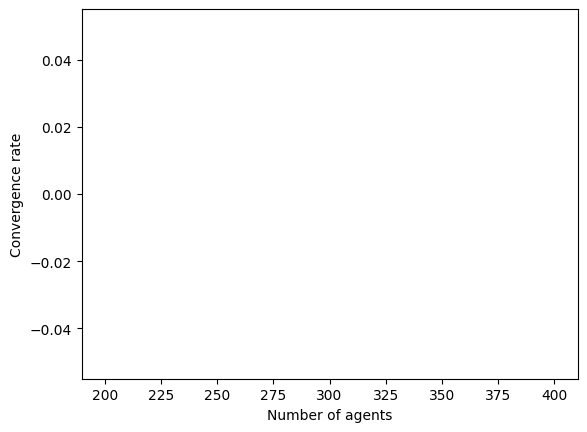

In [ ]:
def run_GWO_mod2(search_agent_no):
    dim = 3
    max_iter = 200
    lb = np.full(dim, -512)
    ub = np.full(dim, 512)

    best_pos, best_score = GWO_mod2(egg_holder, lb, ub, dim, search_agent_no, max_iter)
    error = abs(best_score + 1888.3214)
    converged = error <= 10 # разрешена погрешность в 2 %

    return converged

search_agent_nos = range(200, 401, 20)
num_trials = 10
convergence_rates = []
for search_agent_no in search_agent_nos:
    converged_count = 0
    for i in range(num_trials):
        converged = run_GWO_mod2(search_agent_no)
        if converged:
            converged_count += 1
    convergence_rate = converged_count / num_trials
    convergence_rates.append(convergence_rate)
    print(f"search_agent_no: {search_agent_no}, convergence rate: {convergence_rate}")

plt.bar(search_agent_nos, convergence_rates)
plt.xlabel("Number of agents")
plt.ylabel("Convergence rate")
plt.show()

search_agent_no: 100, convergence rate: 0.2
search_agent_no: 110, convergence rate: 0.11
search_agent_no: 120, convergence rate: 0.19
search_agent_no: 130, convergence rate: 0.25
search_agent_no: 140, convergence rate: 0.26
search_agent_no: 150, convergence rate: 0.23
search_agent_no: 160, convergence rate: 0.32
search_agent_no: 170, convergence rate: 0.33
search_agent_no: 180, convergence rate: 0.27
search_agent_no: 190, convergence rate: 0.3
search_agent_no: 200, convergence rate: 0.33
search_agent_no: 210, convergence rate: 0.36
search_agent_no: 220, convergence rate: 0.36
search_agent_no: 230, convergence rate: 0.34
search_agent_no: 240, convergence rate: 0.39
search_agent_no: 250, convergence rate: 0.37
search_agent_no: 260, convergence rate: 0.41
search_agent_no: 270, convergence rate: 0.45
search_agent_no: 280, convergence rate: 0.33
search_agent_no: 290, convergence rate: 0.45
search_agent_no: 300, convergence rate: 0.44


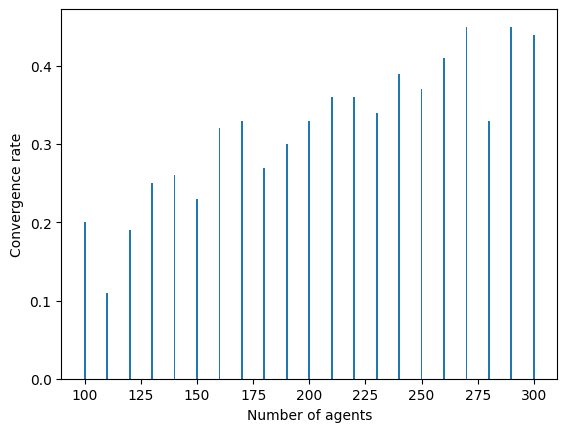

In [ ]:
def run_GWO(search_agent_no):
    dim = 3
    max_iter = 300
    lb = np.full(dim, -512)
    ub = np.full(dim, 512)

    best_pos, best_score = GWO(egg_holder, lb, ub, dim, search_agent_no, max_iter)
    error = abs(best_score + 1888.3213909)
    converged = error <= 18

    return converged

search_agent_nos = range(100, 301, 10)
num_trials = 100
convergence_rates = []
for search_agent_no in search_agent_nos:
    converged_count = 0
    for i in range(num_trials):
        converged = run_GWO(search_agent_no)
        if converged:
            converged_count += 1
    convergence_rate = converged_count / num_trials
    convergence_rates.append(convergence_rate)
    print(f"search_agent_no: {search_agent_no}, convergence rate: {convergence_rate}")

plt.bar(search_agent_nos, convergence_rates)
plt.xlabel("Number of agents")
plt.ylabel("Convergence rate")
plt.show()

search_agent_no: 1, convergence rate: 0.01
search_agent_no: 2, convergence rate: 0.01
search_agent_no: 3, convergence rate: 0.05
search_agent_no: 4, convergence rate: 0.1
search_agent_no: 5, convergence rate: 0.03
search_agent_no: 6, convergence rate: 0.15
search_agent_no: 7, convergence rate: 0.21
search_agent_no: 8, convergence rate: 0.19
search_agent_no: 9, convergence rate: 0.25
search_agent_no: 10, convergence rate: 0.31
search_agent_no: 11, convergence rate: 0.24
search_agent_no: 12, convergence rate: 0.31
search_agent_no: 13, convergence rate: 0.22
search_agent_no: 14, convergence rate: 0.33
search_agent_no: 15, convergence rate: 0.37
search_agent_no: 16, convergence rate: 0.35
search_agent_no: 17, convergence rate: 0.4
search_agent_no: 18, convergence rate: 0.36
search_agent_no: 19, convergence rate: 0.41
search_agent_no: 20, convergence rate: 0.4
search_agent_no: 21, convergence rate: 0.43
search_agent_no: 22, convergence rate: 0.4
search_agent_no: 23, convergence rate: 0.45
s

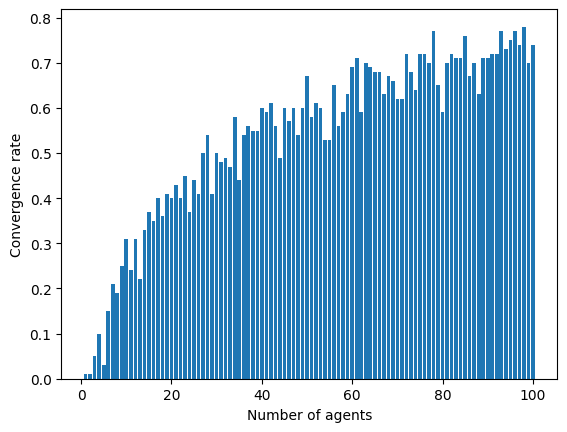

In [ ]:
def run_GWO_mod(search_agent_no):
    dim = 2
    max_iter = 50
    lb = np.full(dim, -512)
    ub = np.full(dim, 512)

    best_pos, best_score = GWO_mod(egg_holder, lb, ub, dim, search_agent_no, max_iter)
    error = abs(best_score + 959.6407)
    converged = error <= 1.0

    return converged

search_agent_nos = range(1, 101)
num_trials = 100
convergence_rates = []
for search_agent_no in search_agent_nos:
    converged_count = 0
    for i in range(num_trials):
        converged = run_GWO_mod(search_agent_no)
        if converged:
            converged_count += 1
    convergence_rate = converged_count / num_trials
    convergence_rates.append(convergence_rate)
    print(f"search_agent_no: {search_agent_no}, convergence rate: {convergence_rate}")

plt.bar(search_agent_nos, convergence_rates)
plt.xlabel("Number of agents")
plt.ylabel("Convergence rate")
plt.show()